# E-commerce Customer Segmentation

Unsupervised learning project to segment e-commerce customers based on behavioral data. Applied feature engineering, K-Means and Hierarchical Clustering, with Elbow Method and Silhouette Score for optimal cluster selection.

Effectively understanding and addressing the diverse needs of customers is a crucial challenge for e-commerce businesses, as it directly impacts marketing efficiency, customer satisfaction, and overall profitability. Without a clear understanding of customer behavior, businesses risk misallocating resources, creating ineffective marketing strategies, and missing opportunities to improve customer retention. To address this challenge, a dataset containing information about e-commerce customers—including details such as location, purchase history, spending habits, and transaction dates—has been provided. The goal of this project is to develop a clustering algorithm to group customers based on shared characteristics. These segments can then be leveraged to optimize marketing efforts, personalize product offerings, and allocate resources more strategically, ultimately fostering a more customer-centric approach and driving business growth.

## Dataset

The data set contains 951,668 rows, each representing a product a customer ordered. The data set contains details about the customer (e.g. location, product type, loyalty member) and order (e.g. days to delivery, delivery date, order date, cost, quantity ordered, profit) based on orders between 1 January 2012 and 30 December 2016.
The data set has 20 features you can choose from:
- **Quantity:** The quantity the customer orders
- **City:** Name of the customer's residence 
- **Continent:** Name of the continent where the customer resides
- **Postal code:** Where the customer resides  
- **State province**: State or province where the customer resides 
- **Order date:** The date the order was placed 
- **Delivery date:** The date the order was delivered 
- **Total revenue:** Total revenue based on ordered items in USD 
- **Unit cost:** Cost per unit ordered in USD 
- **Discount:** Percentage or normal total retail price 
- **Order type label:** Method in which the order was placed
- **Customer country label:** The country where the customer resides 
- **Customer birthdate:** The date the customer was born 
- **Customer group:** Loyalty member group 
- **Customer type:** Loyalty member level 
- **Order ID:** Unique order identifier 
- **Profit:** Total profit
- **Days to delivery:** The number of days for delivery is calculated
- **Loyalty number:** Loyal customer (99) versus non-loyal customer (0).
- **Customer ID:** A unique identifier for the customer

## Project Structure

1. Libraries 
2. Dataset Load and EDA
3. Feature Engineering
4. Clustering
5. Conclusion 





> Start your activity here. Select the pen from the toolbar to add your entry.

# Libraries Import

In [1]:
!pip install gdown

In [2]:
!gdown 'https://drive.google.com/uc?export=download&id=1S5wniOV5_5htDfUFeZhlCLibvtihNLKK'

Failed to retrieve file url:

	Too many users have viewed or downloaded this file recently. Please
	try accessing the file again later. If the file you are trying to
	access is particularly large or is shared with many people, it may
	take up to 24 hours to be able to view or download the file. If you
	still can't access a file after 24 hours, contact your domain
	administrator.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?export=download&id=1S5wniOV5_5htDfUFeZhlCLibvtihNLKK

but Gdown can't. Please check connections and permissions.


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import IsolationForest
import matplotlib.cm as cm
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage



# Dataset Load

In [4]:
df = pd.read_csv('CUSTOMERS_CLEAN.csv')  # Dataset Import

df.head()

,Quantity,City,Continent,Postal_Code,State_Province,Order_Date,Delivery_Date,Total Revenue,Unit Cost,Discount,OrderTypeLabel,CustomerCountryLabel,Customer_BirthDate,Customer_Group,Customer_Type,Order ID,Profit,Days to Delivery,Loyalty Num,Customer ID
0,3,Leinster,Oceania,6437,Western Australia,01JAN2012,07JAN2012,$28.50,$9.10,.,Internet Sale,Australia,08MAY1978,Internet/Catalog Customers,Internet/Catalog Customers,1230000033,$1.20,6,99,8818
1,2,Berowra,Oceania,2081,New South Wales,01JAN2012,04JAN2012,$113.40,$56.90,.,Internet Sale,Australia,13DEC1978,Orion Club Gold members,Orion Club Gold members high activity,1230000204,($0.40),3,99,47793
2,2,Berowra,Oceania,2081,New South Wales,01JAN2012,04JAN2012,$41.00,$18.50,.,Internet Sale,Australia,13DEC1978,Orion Club Gold members,Orion Club Gold members high activity,1230000204,$4.00,3,99,47793
3,1,Northbridge,Oceania,2063,New South Wales,01JAN2012,03JAN2012,$35.20,$29.60,.,Internet Sale,Australia,22JUN1997,Orion Club Gold members,Orion Club Gold members high activity,1230000268,$5.60,2,0,71727
4,1,Montréal,North America,NaN,Quebec,01JAN2012,04JAN2012,$24.70,$23.60,.,Internet Sale,Canada,28JAN1978,Orion Club Gold members,Orion Club Gold members medium activity,1230000487,$1.10,3,99,74503


In [5]:
df.shape

(951669, 20)

# EDA

In this section I start looking into the dataset to understand if there are:

* Missing values -> to understand their impact
* Duplicated values -> to be deleted



In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 951669 entries, 0 to 951668
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Quantity              951669 non-null  int64 
 1   City                  951534 non-null  object
 2   Continent             951669 non-null  object
 3   Postal_Code           947953 non-null  object
 4   State_Province        834477 non-null  object
 5   Order_Date            951669 non-null  object
 6   Delivery_Date         951669 non-null  object
 7   Total Revenue         951669 non-null  object
 8   Unit Cost             951669 non-null  object
 9   Discount              951669 non-null  object
 10  OrderTypeLabel        951669 non-null  object
 11  CustomerCountryLabel  951669 non-null  object
 12  Customer_BirthDate    951669 non-null  object
 13  Customer_Group        951669 non-null  object
 14  Customer_Type         951669 non-null  object
 15  Order ID         

Check for null values

In [7]:
df.isnull().sum()

,0
Quantity,0
City,135
Continent,0
Postal_Code,3716
State_Province,117192
Order_Date,0
Delivery_Date,0
Total Revenue,0
Unit Cost,0
Discount,0


There are some null vaues but it doesn't matter in this analysis since all the null values are related to the geographical area and it will not be taken into account later on

Check for duplicates rows

In [8]:
df.duplicated().sum()

21

In [9]:
print(f'The initial number of row of the df is {df.shape[0]}')
df.drop_duplicates(inplace=True)
print(f'The final number of row of the df is {df.shape[0]}')

The initial number of row of the df is 951669
The final number of row of the df is 951648


# Feature Engineering

In this section some feature will be added and then the df will be transormed to have one customer per row, by aggregating the most relevant features. The main features will be:



*   Frequency -> number of total different orders
*   Recency -> date of the last order
*   Customer age
*   Average unit cost -> average price of products purchased
*   CLV -> average value of revenues generated thanks to the client


In [10]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'], format='%d%b%Y')
df['Customer_BirthDate'] = pd.to_datetime(df['Customer_BirthDate'], format='%d%b%Y')
df['Delivery_Date'] = pd.to_datetime(df['Delivery_Date'], format='%d%b%Y')

In [11]:
# To calculate the customer age, I consider 30 - DEC - 2016 as the last day of the data frame. So, the customer age will be the difference between 30 DEC 2016 and the customer day of birth
last_day = pd.to_datetime('30DEC2016', format='%d%b%Y')
df['Customer_Age'] = (last_day - df['Customer_BirthDate']).dt.days // 365
df['Recency'] = (last_day - df['Delivery_Date']).dt.days

In [12]:
#These lines to convert a currency value into a numerical one

df['Unit Cost'] = df['Unit Cost'].str.slice(1)
df['Unit Cost'] = df['Unit Cost'].str.replace(',', '')
df['Unit Cost'] = df['Unit Cost'].astype(float)

df['Total Revenue'] = df['Total Revenue'].str.slice(1)
df['Total Revenue'] = df['Total Revenue'].str.replace(',', '')
df['Total Revenue'] = df['Total Revenue'].astype(float)

In [13]:
# Creation of new features by taking the min/sum or count based on the request values
df['Frequency'] = df.groupby( 'Customer ID' )['Order ID'].transform('count') #count of each purchase per customer
df['Recency'] = df.groupby( 'Customer ID' )['Recency'].transform('min') #the recency is the last purchase per customer, so I take the min
df['Average_unit_cost'] = df.groupby( 'Customer ID' )['Unit Cost'].transform('mean') # I used the mean to consider the cost
df['CLV'] = df.groupby( 'Customer ID' )['Total Revenue'].transform('sum') # I used the sum to calculate the lifetime value of each client


In [14]:
# I create a dataset with one customer per raw, considering just the following five features
df_customer = df.groupby('Customer ID')[['Frequency', 'Recency', 'Customer_Age', 'Average_unit_cost', 'CLV']].max().reset_index()
df_customer.set_index('Customer ID', inplace=True)

In [15]:
print(f'The dataset is transformed to have a row per each client and now it contains {df_customer.shape[0]} rows')
df_customer.head()

The dataset is transformed to have a row per each client and now it contains 68300 rows


,Frequency,Recency,Customer_Age,Average_unit_cost,CLV
Customer ID,,,,,
1,35,17,63,89.622857,4322.70
3,20,119,33,90.505000,2821.00
4,9,1108,33,37.195556,782.67
5,19,5,28,107.947368,2810.98
6,15,190,58,52.526667,1604.58


# EDA of the new features created

In [16]:
df_customer.describe()

,Frequency,Recency,Customer_Age,Average_unit_cost,CLV
count,68300.000000,68300.000000,68300.000000,68300.000000,68300.000000
mean,13.933353,366.399971,43.134319,78.895675,1950.148420
std,11.328807,414.289931,17.486209,38.005259,1719.916365
min,1.000000,-20.000000,19.000000,0.500000,0.630000
25%,6.000000,44.000000,28.000000,57.579792,696.000000
50%,11.000000,188.000000,43.000000,73.450000,1497.400000
75%,19.000000,538.000000,58.000000,92.515260,2709.845000
max,121.000000,1824.000000,74.000000,1463.500000,18860.960000


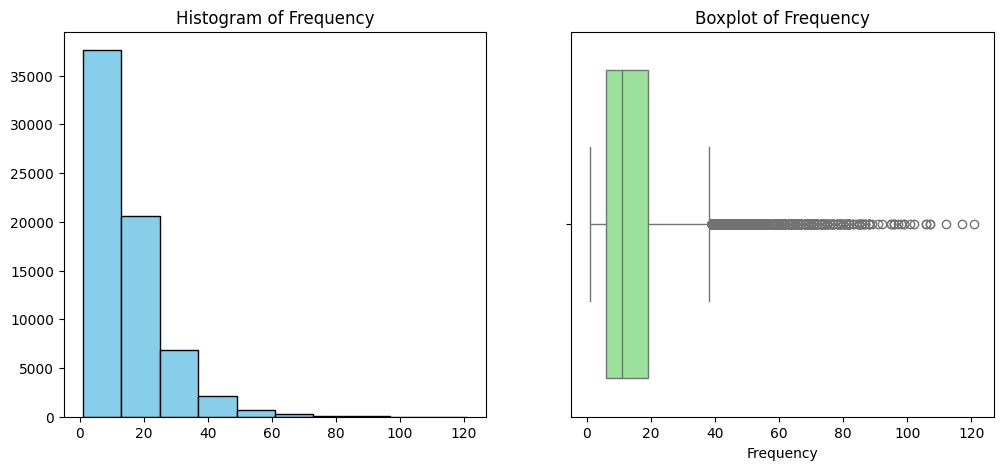

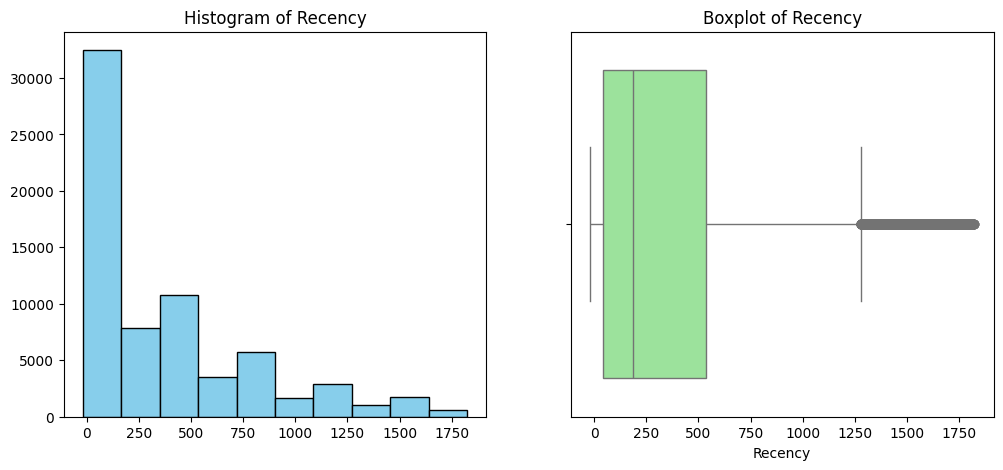

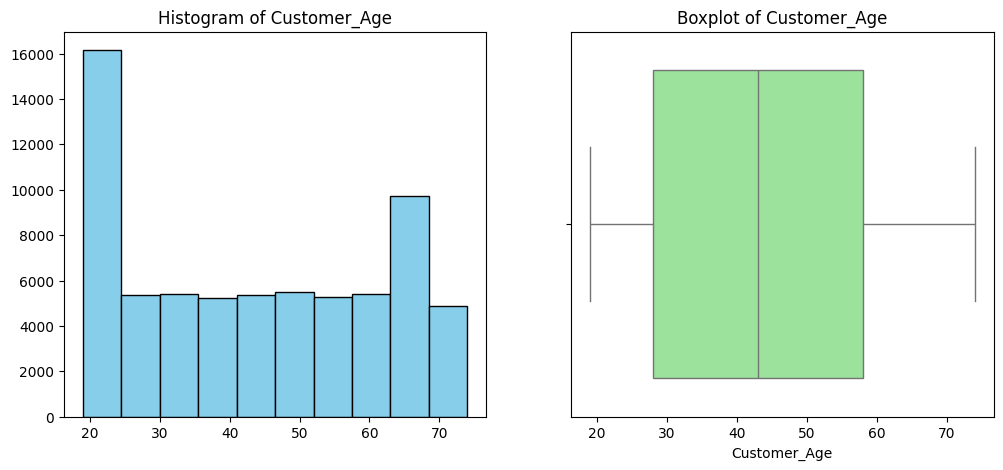

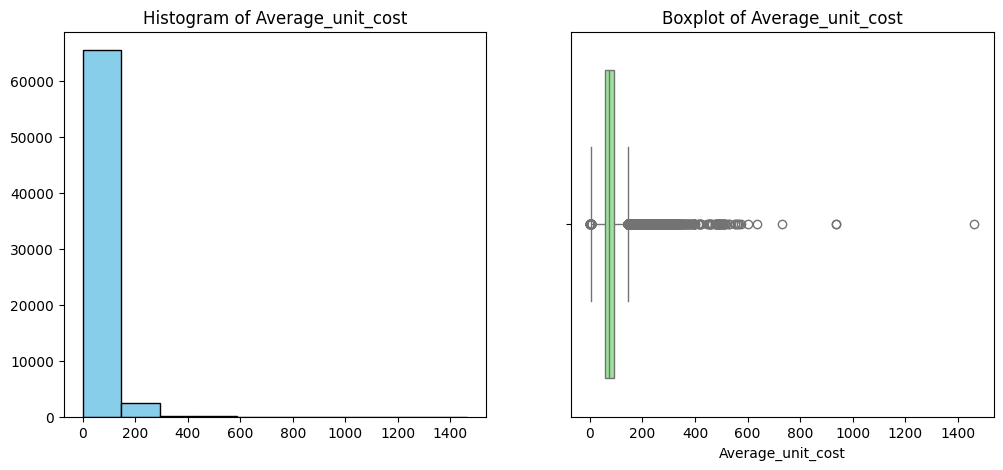

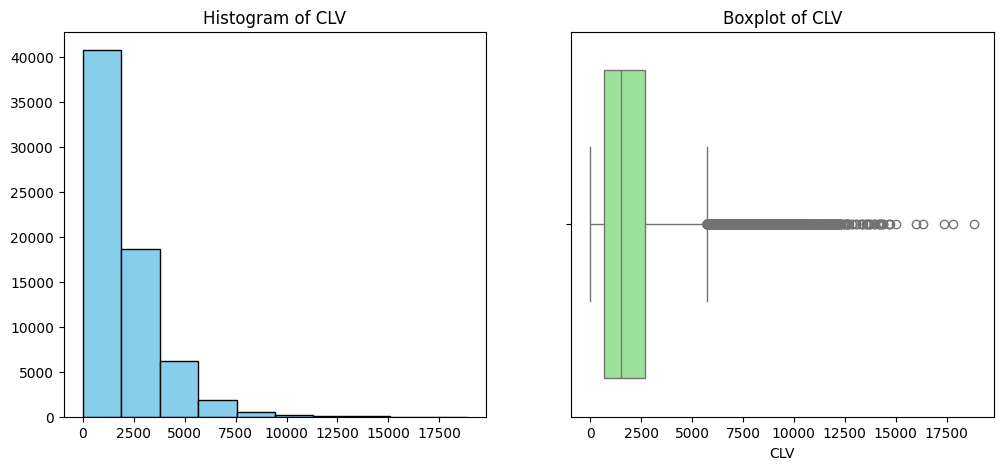

In [17]:
for col in df_customer.columns:
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    axes[0].hist(df_customer[col],  color='skyblue', edgecolor='black')
    axes[0].set_title(f'Histogram of {col}')
    sns.boxplot(x=df_customer[col], ax=axes[1], color='lightgreen')
    axes[1].set_title(f'Boxplot of {col}')
    plt.show()

# Outliers removal

Looking at the boxplot is possible to see that there are a lot of outliers. Since the k-means cluster algo is sensitive to these, I decide to remove a portion of these outliers.

To this purpose I am going to use isolation forest, whith a "contamination" factor of 0.05, to remove about 5% of the dataset.

In [18]:
n_estimators = 200
contamination = 0.05
iso_forest = IsolationForest(n_estimators=n_estimators, contamination=contamination, random_state=42)
iso_forest.fit(df_customer)
anomalies_per_IsoForest = iso_forest.predict(df_customer)
unique_elements, counts_iso_forest = np.unique(anomalies_per_IsoForest, return_counts=True)
print(f'for n_estimators = {n_estimators} and contamination = {contamination} the anomalies found are {counts_iso_forest[0]}, and the percentage of anomalies is {100*counts_iso_forest[0] / len(anomalies_per_IsoForest):.1f} %')

for n_estimators = 200 and contamination = 0.05 the anomalies found are 3415, and the percentage of anomalies is 5.0 %


In [19]:
df_customer['anomalies_per_IsoForest'] = anomalies_per_IsoForest
df_customer_no_outliers = df_customer.drop(df_customer[df_customer['anomalies_per_IsoForest'] == -1].index)
df_customer_no_outliers.drop('anomalies_per_IsoForest', axis=1, inplace=True)

In [20]:
df_customer_no_outliers.describe()

,Frequency,Recency,Customer_Age,Average_unit_cost,CLV
count,64885.000000,64885.000000,64885.000000,64885.000000,64885.000000
mean,13.342822,346.819342,43.147584,76.454657,1832.984092
std,9.596274,384.856035,17.409857,29.584648,1436.028865
min,1.000000,-20.000000,19.000000,0.500000,0.630000
25%,6.000000,44.000000,28.000000,57.300000,708.100000
50%,11.000000,182.000000,43.000000,72.871429,1483.150000
75%,19.000000,514.000000,58.000000,91.216667,2626.400000
max,56.000000,1810.000000,74.000000,260.957143,7875.900000


After the outliers elimination I am going to visualize the distribution of each feature

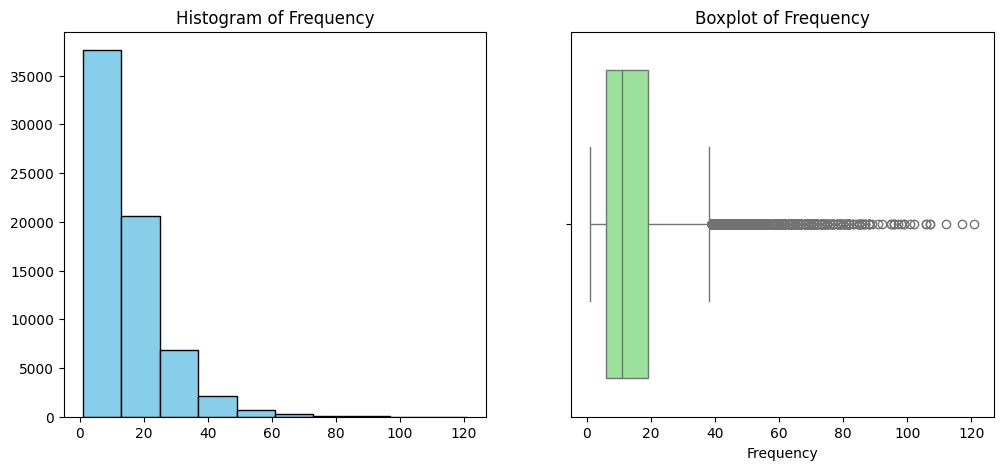

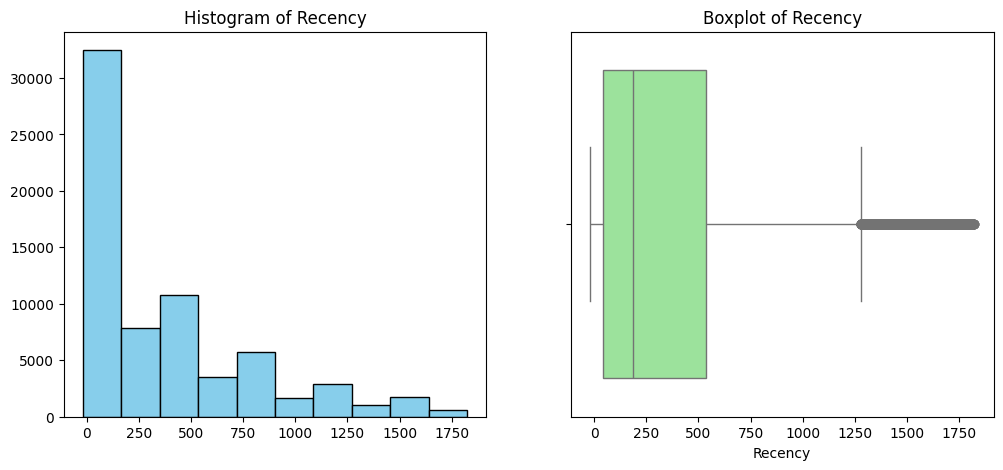

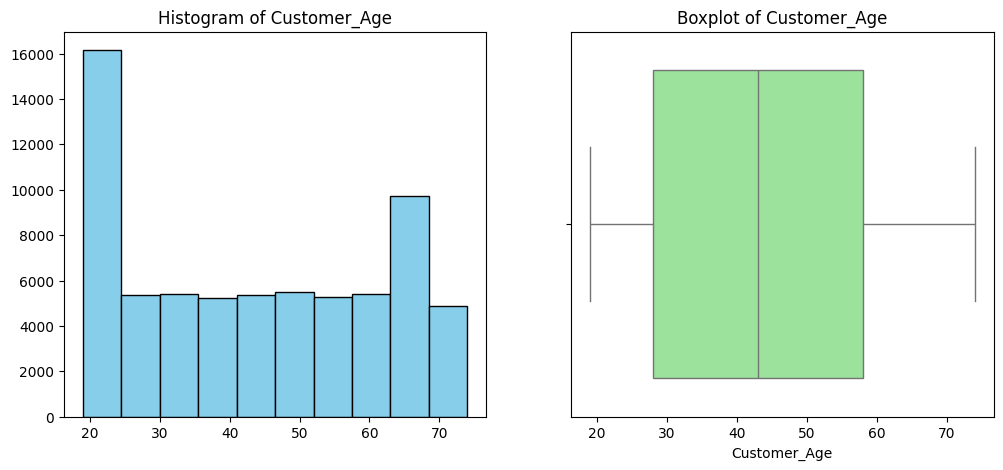

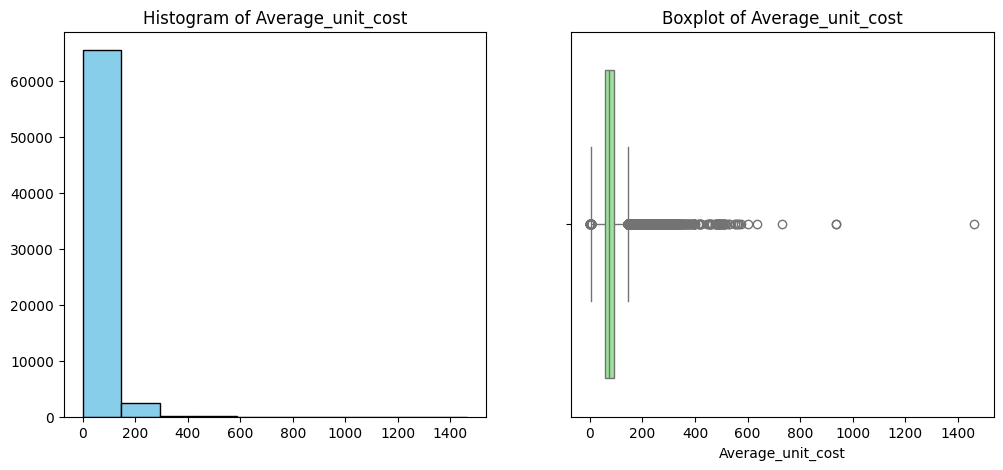

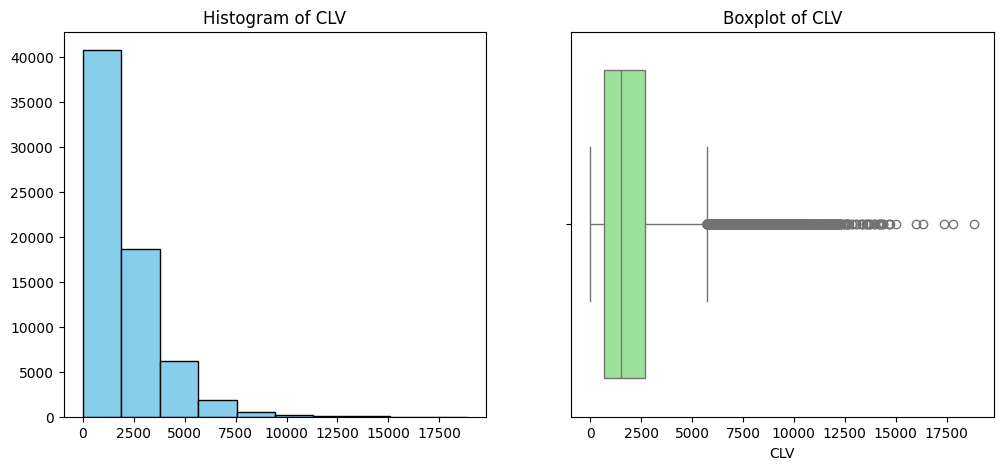

In [21]:
for col in df_customer_no_outliers.columns:
    fig, axes = plt.subplots(1, 2, figsize=(12,5))
    axes[0].hist(df_customer[col],  color='skyblue', edgecolor='black')
    axes[0].set_title(f'Histogram of {col}')
    sns.boxplot(x=df_customer[col], ax=axes[1], color='lightgreen')
    axes[1].set_title(f'Boxplot of {col}')
    plt.show()

# Optimal Number of Clusters

In this section the clustering algoritmhs are applied.

To start, StandardScaling is applied since there are a lot of outliers which could affect the clustering made by k-means and the agglomerative one.

After the scaling, 2 different techniques are applied to find the optimal value of the number of clusters. In particular:

* Elbow method
* Silhouette score



In [22]:
# I scale the dataset with the StandardScaler since there are a lot of outliers
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_customer_no_outliers),
                         index=df_customer_no_outliers.index,
                         columns=df_customer_no_outliers.columns)

In [23]:
df_scaled.head()

,Frequency,Recency,Customer_Age,Average_unit_cost,CLV
Customer ID,,,,,
1,2.256849,-0.857001,1.140306,0.445106,1.733764
3,0.693731,-0.591964,-0.582869,0.474924,0.688025
4,-0.452556,1.977847,-0.582869,-1.327019,-0.731407
5,0.589523,-0.888181,-0.870065,1.064503,0.681047
6,0.172691,-0.407478,0.853110,-0.808804,-0.159054


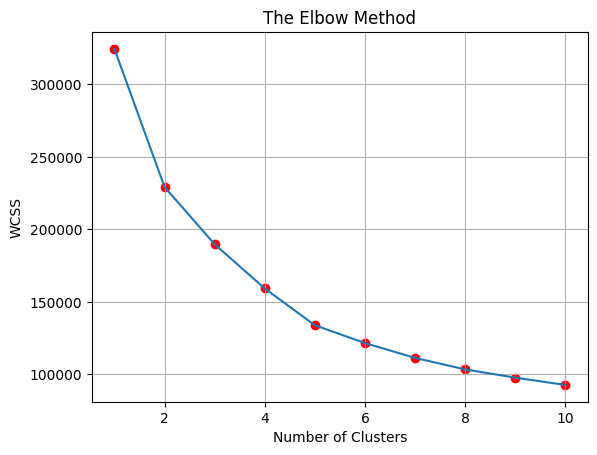

In [24]:
# I apply elbow method to identify the optimal number of clusters
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init = 'k-means++',random_state=0, n_init = 10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.scatter(range(1,11),wcss,marker = 'o',color = 'red')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

Using the elbow method, it is not clear which is the otpimal number of cluster to choice. Aniway, from cluster 5 onwards, the decrease in WCSS becomes less significant, indicating that adding more clusters does not significantly improve cluster cohesion. This suggests that the otpimal number of cluster lies between 4 and 6.

In [25]:
silhouette_avg_list = []
silhouette_list = []

for n_clusters in range(2, 11):
    # Fitting e predizione del clustering
    clusterer = KMeans(n_clusters=n_clusters, init='k-means++', random_state=0, n_init=10)
    cluster_labels = clusterer.fit_predict(df_scaled)
    # Calculation of the silhouette value for each sample in the df_scaled
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    silhouette_values = silhouette_samples(df_scaled, cluster_labels)
    silhouette_avg_list.append(silhouette_avg)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    silhouette_df = pd.DataFrame(silhouette_values, columns=['silhouette_value'])
    silhouette_df['cluster'] = cluster_labels
    silhouette_list.append(silhouette_df)

For n_clusters = 2 The average silhouette_score is : 0.2609503581042983
For n_clusters = 3 The average silhouette_score is : 0.23035349521826579
For n_clusters = 4 The average silhouette_score is : 0.2429583064149907
For n_clusters = 5 The average silhouette_score is : 0.2558244191074343
For n_clusters = 6 The average silhouette_score is : 0.22910350800627677
For n_clusters = 7 The average silhouette_score is : 0.22348105743773347
For n_clusters = 8 The average silhouette_score is : 0.22428753794102646
For n_clusters = 9 The average silhouette_score is : 0.22242705936988905
For n_clusters = 10 The average silhouette_score is : 0.21638889720364837


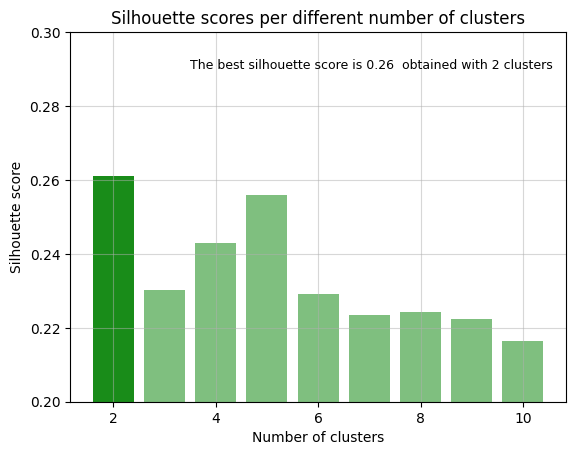

In [26]:
best_silhouette_score = max(silhouette_avg_list)
best_silhouette_score_index = silhouette_avg_list.index(best_silhouette_score)

figure = (10,8)
plt.bar(range(2,11),silhouette_avg_list,color = 'green',alpha = 0.5)
plt.bar(best_silhouette_score_index+2,best_silhouette_score,color = 'green',alpha = 0.8)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.ylim(0.2,0.3)
plt.title('Silhouette scores per different number of clusters')
plt.annotate(f'The best silhouette score is {np.around(best_silhouette_score,2)}  obtained with {best_silhouette_score_index+2} clusters', (3.5,0.29), fontsize=9)
plt.grid(alpha = 0.5)
plt.show()

Silhouette analysis shows that the optimal number of features for the highest score is 2,indicating that with 2 clusters they are well separated and defined. Neverthless, reducing to 2 clusters would be too limiting, losing significant information. The next best silhouette score is achieved with 5 clusters, which is also consistent considering the elbow metod, and for these reasons I decided to use 5 clusters later on. Overall, the silhouette scores are not very high, suggesting some overlap between clusters.

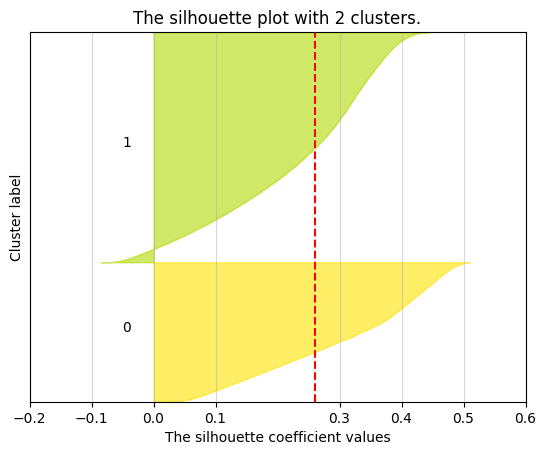

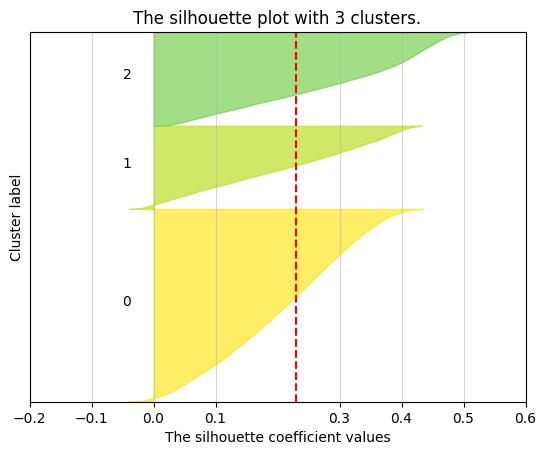

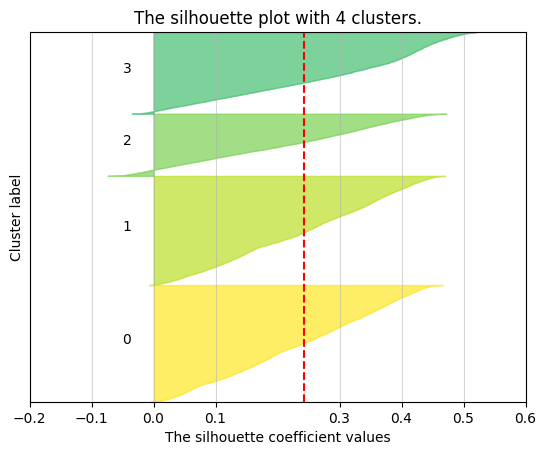

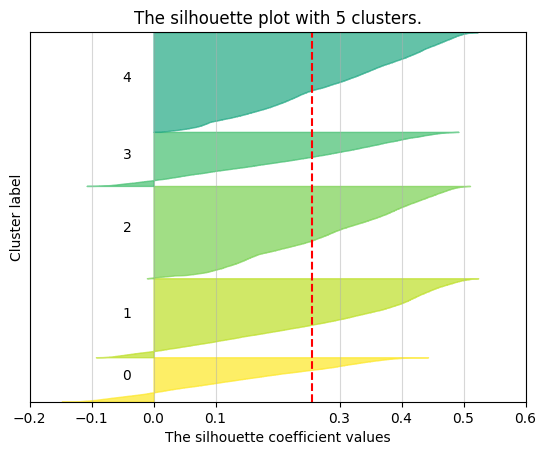

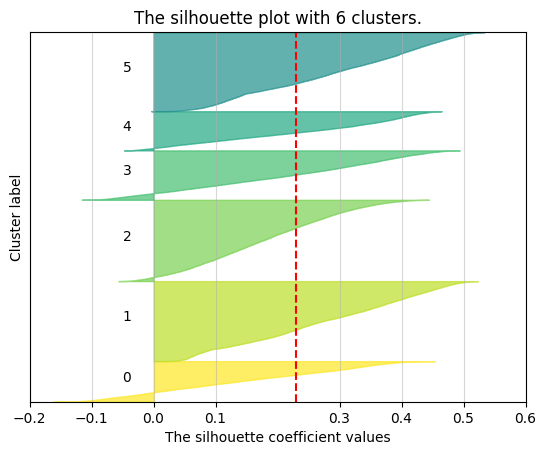

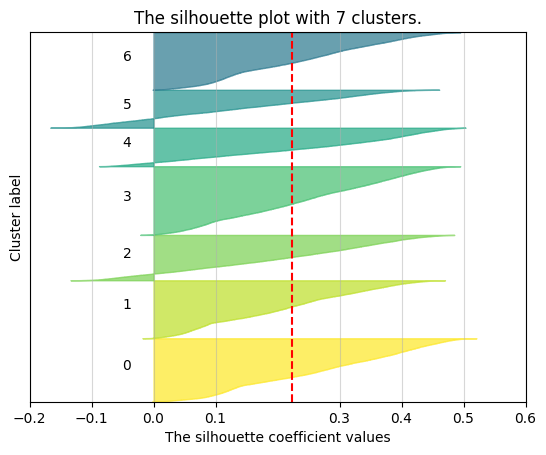

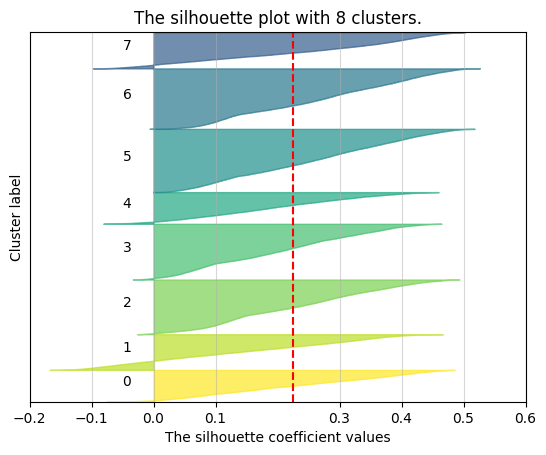

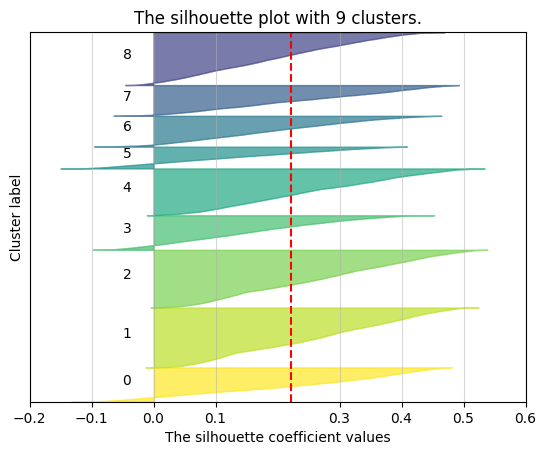

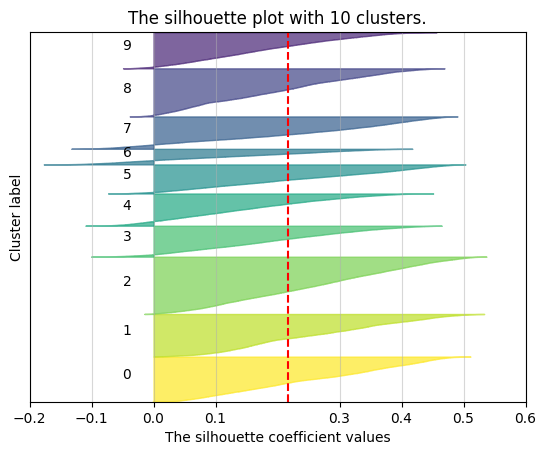

In [27]:
j = 0
for df in silhouette_list:

    fig = (10, 7)

    
    plt.xlim([-0.2, 0.6])
   
    plt.ylim([0, len(df) + (df['cluster'].nunique() + 1) * 10])

    y_lower = 10
    for i in range(df['cluster'].nunique()):
        
        ith_cluster_silhouette_values = df[df['cluster']== i].sort_values(by='silhouette_value')
        ith_cluster_silhouette_values = ith_cluster_silhouette_values['silhouette_value']


        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.viridis_r(float(i) / n_clusters)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

       
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        
        y_lower = y_upper + 10  # 10 for the 0 samples.

    plt.title(f"The silhouette plot with {j+2} clusters.")
    plt.xlabel("The silhouette coefficient values")
    plt.ylabel("Cluster label")

 
    plt.axvline(x=silhouette_avg_list[j], color="red", linestyle="--")

    plt.yticks([])  
    plt.xticks([-0.2,-0.1, 0, 0.1, 0.3, 0.4, 0.5,0.6])
    j += 1
    plt.grid(alpha=0.5)
    plt.show()




In these plot the silhouette value per each points of each clusters is shown.  

It's worth noticing that with all the numbers of cluster some silhouette values are negative, which means that some of the point belonging to one cluster are closer to the point of one another.

# K-means Clustering

After the otpimization of the numbers of cluster, the main algorithm is computed.

In [28]:
# I chose 5 as best number of clusters. BAsed on this result, I calculate the k-means algo for
df_cluster = pd.DataFrame(df_scaled, columns=df_customer_no_outliers.columns, index=df_scaled.index)
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0, n_init=10)
cluster_kmeans = kmeans.fit(df_scaled)
df_cluster['cluster'] = cluster_kmeans.labels_
centroids = kmeans.cluster_centers_


In [29]:
df_cluster.head()

,Frequency,Recency,Customer_Age,Average_unit_cost,CLV,cluster
Customer ID,,,,,,
1,2.256849,-0.857001,1.140306,0.445106,1.733764,1
3,0.693731,-0.591964,-0.582869,0.474924,0.688025,1
4,-0.452556,1.977847,-0.582869,-1.327019,-0.731407,3
5,0.589523,-0.888181,-0.870065,1.064503,0.681047,1
6,0.172691,-0.407478,0.853110,-0.808804,-0.159054,2


To visualize in 2D the clustering a dimensionality reduction is needed. For this purpose, the PCA algorithm is used.

In [30]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_cluster.iloc[:, :5])
centroids_2d = pca.transform(centroids)
df_pca = pd.DataFrame(pca_result, columns=['PC1', 'PC2'], index=df_scaled.index)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


In [31]:
# Compare the shape of the normalised and PCA data.
print("Normalised data: ", df_cluster.shape)
print("PCA data for visualisation: ",df_pca.shape)

Normalised data:  (64885, 6)
PCA data for visualisation:  (64885, 2)


In [32]:
pca.explained_variance_ratio_

array([0.45207014, 0.20293884])

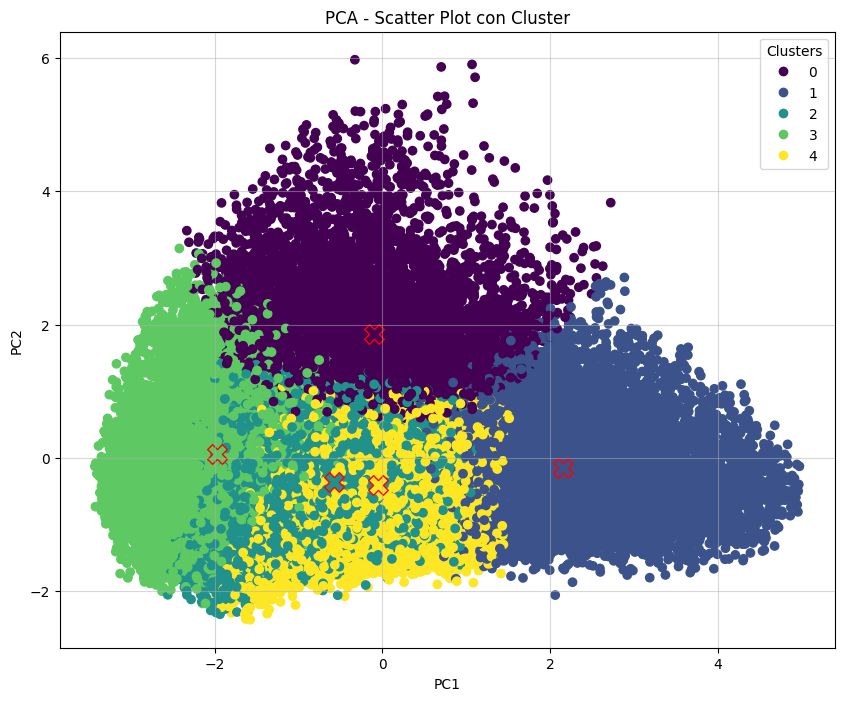

In [33]:
# I add the cluster column to the df_pca to label the points with their own cluster
df_pca['cluster'] = df_cluster['cluster']


plt.figure(figsize=(10, 8))


scatter = plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['cluster'], cmap='viridis')

handles, labels = scatter.legend_elements()
plt.legend(handles, labels, title="Clusters")

#In this part I add the cluster centroid per each cluster
for i, centroid in enumerate(centroids_2d):
    plt.scatter(centroid[0], centroid[1], c=[scatter.cmap(scatter.norm(i))], marker='X', s=200, edgecolor='red')

plt.title('PCA - Scatter Plot con Cluster')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(alpha=0.5)
plt.show()

The 2D plot obtained through PCA shows that the clusters are fairly well-defined, even after dimensionality reduction, although some overlap remains. To fully understand the true characteristics of each cluster, it's necessary to revert to the original dimensions and conduct a deeper analysis.

In [59]:
df_cluster.iloc[:, :5]

,Frequency,Recency,Customer_Age,Average_unit_cost,CLV
Customer ID,,,,,
1,2.256849,-0.857001,1.140306,0.445106,1.733764
3,0.693731,-0.591964,-0.582869,0.474924,0.688025
4,-0.452556,1.977847,-0.582869,-1.327019,-0.731407
5,0.589523,-0.888181,-0.870065,1.064503,0.681047
6,0.172691,-0.407478,0.853110,-0.808804,-0.159054
...,...,...,...,...,...
94247,-0.035725,-0.727081,-0.582869,1.281312,1.061697
94248,-0.765180,1.058016,-0.582869,0.567709,-0.592273
94250,-0.973596,1.486751,-1.387017,1.305428,-0.630357


In [67]:
# Transform the data with t-SNE.
TSNE_model = TSNE(n_components=2, perplexity=10.0)
TSNE_transformed_data = TSNE_model.fit_transform(df_cluster.iloc[:, :5])

# View the shape and data type.
print("TSNE transformed data shape:", TSNE_transformed_data.shape)

TSNE transformed data shape: (64885, 2)


In [70]:
TSNE_transformed_data_df = pd.DataFrame(TSNE_transformed_data, columns=['TSNE1', 'TSNE2'],index=df_scaled.index)
TSNE_transformed_data_df

,TSNE1,TSNE2
Customer ID,,
1,74.167969,73.764442
3,72.393738,-5.400815
4,-80.202316,34.072189
5,74.159004,-13.271285
6,-37.777599,-24.229485
...,...,...
94247,35.225151,53.993057
94248,-52.964138,56.196369
94250,-25.637661,96.945320


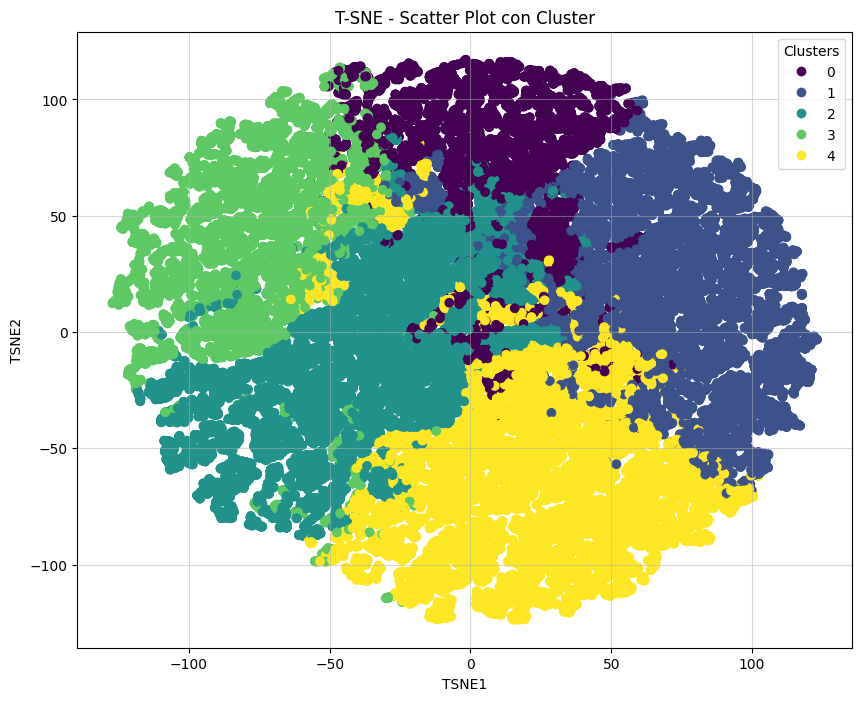

In [71]:
# I add the cluster column to the df_pca to label the points with their own cluster
TSNE_transformed_data_df['cluster'] = df_cluster['cluster']


plt.figure(figsize=(10, 8))


scatter = plt.scatter(TSNE_transformed_data_df['TSNE1'], TSNE_transformed_data_df['TSNE2'], c=TSNE_transformed_data_df['cluster'], cmap='viridis')

handles, labels = scatter.legend_elements()
plt.legend(handles, labels, title="Clusters")

plt.title('T-SNE - Scatter Plot con Cluster')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.grid(alpha=0.5)
plt.show()

The interpretation provided for the PCA is the same in this case, as the dimensionality reduction seems not capable of capturing the real underlying structure of the data.

# Cluster Interpretation

In this section, inverse scaling transformation is performed, to recreate a dataset with the correct values per each feature. In this way is possible to understand the underlying structure of each cluster.

In [34]:
df_original = scaler.inverse_transform(df_scaled)
df_original = pd.DataFrame(df_original,df_cluster.index,df_customer_no_outliers.columns)
df_original ['cluster'] = df_cluster['cluster']
df_original.head()

,Frequency,Recency,Customer_Age,Average_unit_cost,CLV,cluster
Customer ID,,,,,,
1,35.0,17.0,63.0,89.622857,4322.70,1
3,20.0,119.0,33.0,90.505000,2821.00,1
4,9.0,1108.0,33.0,37.195556,782.67,3
5,19.0,5.0,28.0,107.947368,2810.98,1
6,15.0,190.0,58.0,52.526667,1604.58,2


In [35]:
occurrences = df_original['cluster'].value_counts()


In [36]:
occurrences.sort_index(inplace = True)

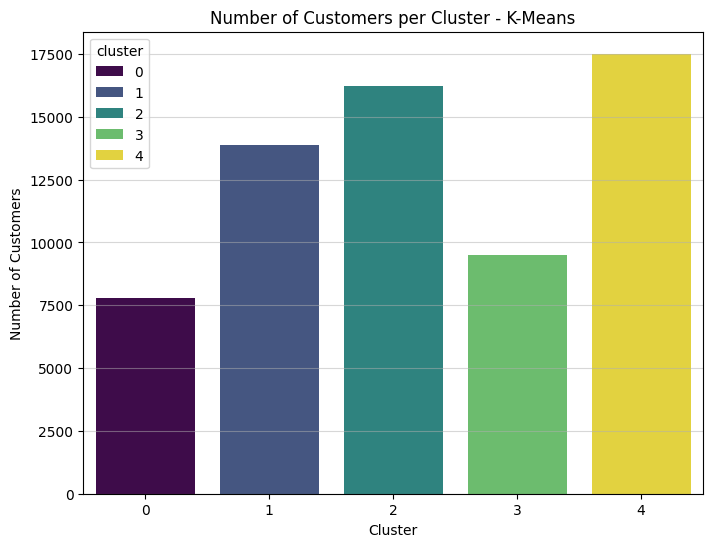

In [37]:
plt.figure(figsize=(8, 6))
cmap = plt.get_cmap('viridis', len(occurrences.index))
sns.barplot(x=occurrences.index, y=occurrences.values,hue =occurrences.index,  palette=cmap)
plt.xlabel("Cluster")
plt.ylabel("Number of Customers")
plt.title("Number of Customers per Cluster - K-Means")
plt.xticks(ticks=range(len(occurrences.index)), labels=occurrences.index)
plt.grid(axis='y', alpha=0.5)
plt.show()

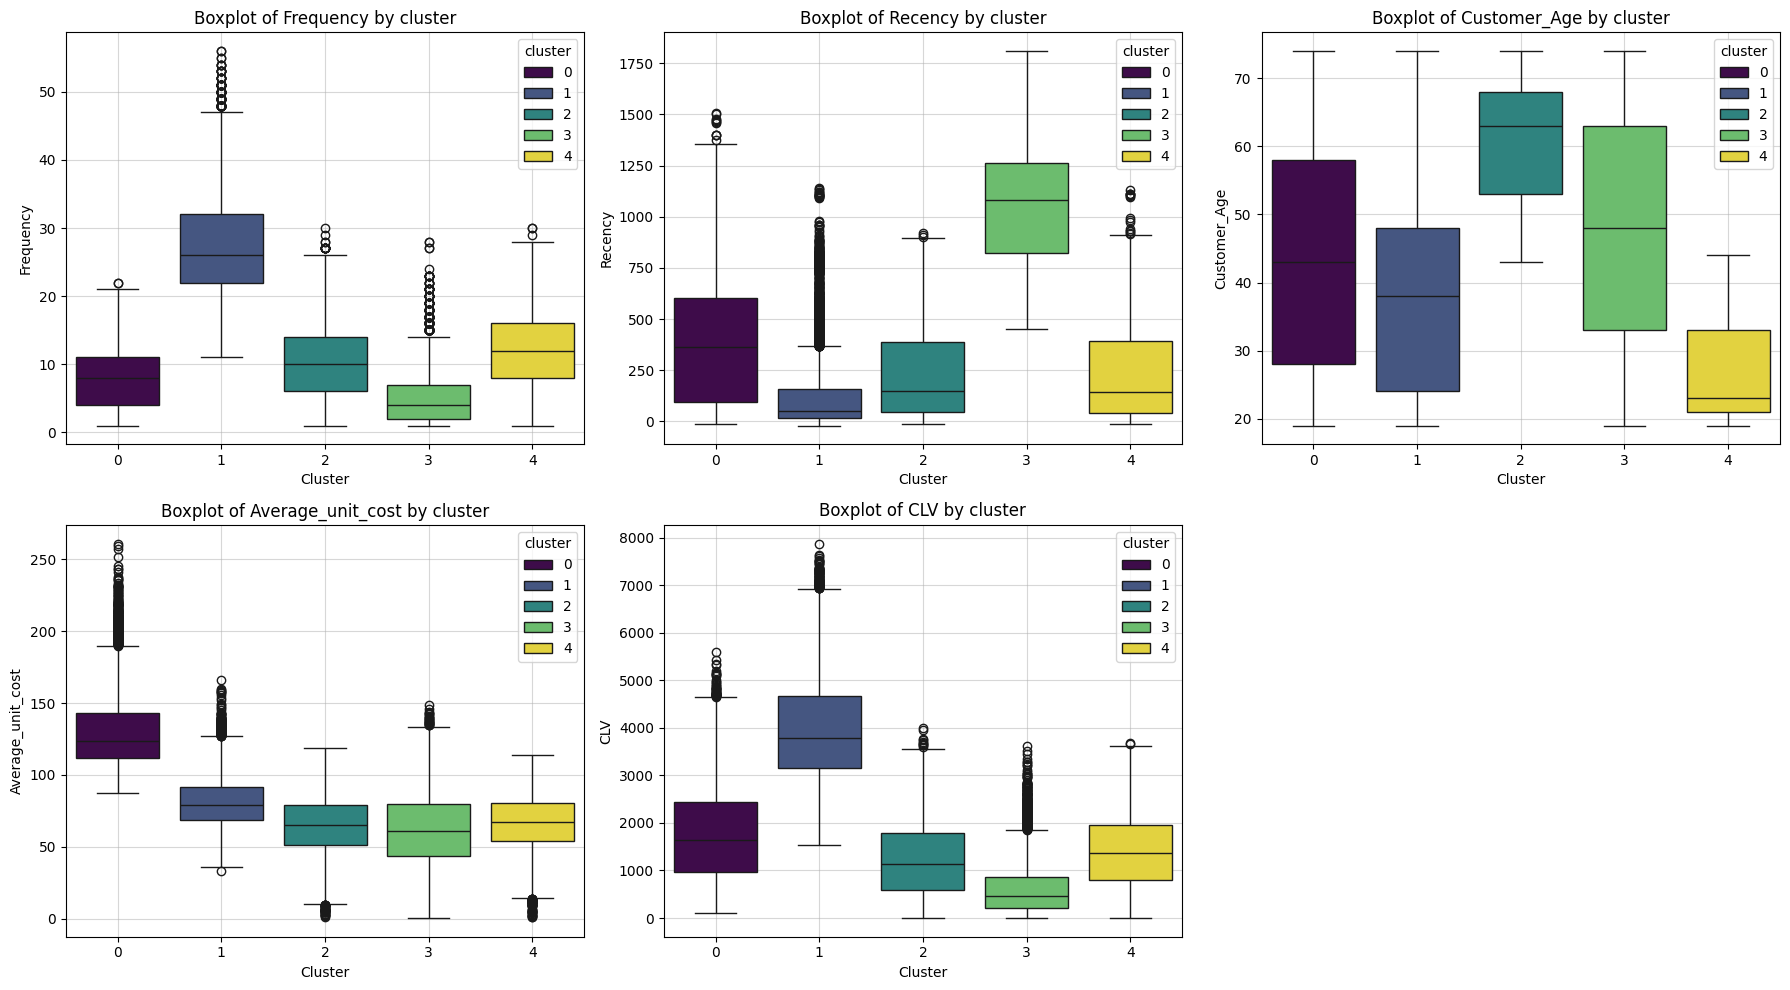

In [38]:

cmap = plt.get_cmap('viridis',  df_original['cluster'].nunique())
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes[1, 2].axis('off')

for i, col in enumerate(df_cluster.columns):
    if col == 'cluster':
        continue
    ax = axes[i // 3, i % 3]
    sns.boxplot(x='cluster', y=col, data=df_original, hue='cluster', palette=cmap, ax=ax)
    ax.set_title(f'Boxplot of {col} by cluster')
    ax.set_xlabel('Cluster')
    ax.grid(alpha=0.5)

plt.tight_layout()
plt.show()


Based on the clustering analysis and the box plots, the following characteristics emerged for each cluster:

* Cluster 0: Medium frequency of purchase, high recency of last purchase, wide age spread, high product cost, and medium CLV.
* Cluster 1: High purchase frequency, low recency, downward age spread, medium-high cost, and high CLV.
* Cluster 2: Medium purchase frequency, low-to-medium recency, high age, medium cost, and low-to-medium CLV.
* Cluster 3: Low purchase frequency, high recency, wide age spread, medium cost, and low CLV.
* Cluster 4: Medium-high purchase frequency, low-to-medium recency, low age, medium cost, and medium CLV.

In [39]:
summary_stats =df_original.groupby('cluster').describe()
summary_stats = summary_stats.transpose()
summary_stats.iloc[:,:]

cluster                            0             1             2            3  \
Frequency         count  7801.000000  13873.000000  16206.000000  9495.000000   
                  mean      7.981413     27.647733     10.289152     5.238125   
                  std       4.387837      7.500305      5.585260     3.819040   
                  min       1.000000     11.000000      1.000000     1.000000   
                  25%       4.000000     22.000000      6.000000     2.000000   
                  50%       8.000000     26.000000     10.000000     4.000000   
                  75%      11.000000     32.000000     14.000000     7.000000   
                  max      22.000000     56.000000     30.000000    28.000000   
Recency           count  7801.000000  13873.000000  16206.000000  9495.000000   
                  mean    385.615434    127.803287    220.087560  1067.933333   
                  std     319.181166    176.125321    202.613910   281.824117   
                  min     -12.000000    -20.000000    -12.000000   453.000000   
                  25%      97.000000     17.000000     44.000000   823.500000   
                  50%     364.000000     50.000000    149.000000  1081.000000   
                  75%     602.000000    158.000000    387.000000  1261.000000   
                  max    1508.000000   1140.000000    921.000000  1810.000000   
Customer_Age      count  7801.000000  13873.000000  16206.000000  9495.000000   
                  mean     43.451096     38.981186     60.464581    47.939652   
                  std      16.254410     14.489999      8.795258    17.323762   
                  min      19.000000     19.000000     43.000000    19.000000   
                  25%      28.000000     24.000000     53.000000    33.000000   
                  50%      43.000000     38.000000     63.000000    48.000000   
                  75%      58.000000     48.000000     68.000000    63.000000   
                  max      74.000000     74.000000     74.000000    74.000000   
Average_unit_cost count  7801.000000  13873.000000  16206.000000  9495.000000   
                  mean    130.494174     81.021257     65.072445    62.209296   
                  std      25.944033     17.446677     19.741840    25.462480   
                  min      87.382353     32.846875      1.200000     0.500000   
                  25%     111.771429     68.440816     51.546591    43.358333   
                  50%     123.881818     79.020000     65.226667    60.700000   
                  75%     143.011111     91.857143     79.280000    79.770833   
                  max     260.957143    165.740000    118.766667   148.950000   
CLV               count  7801.000000  13873.000000  16206.000000  9495.000000   
                  mean   1754.919141   3991.183970   1220.556020   608.604443   
                  std     993.360573   1078.792260    764.686644   532.939330   
                  min      96.700000   1544.500000      1.600000     0.630000   
                  25%     967.200000   3156.100000    586.925000   206.290000   
                  50%    1632.600000   3790.380000   1131.290000   453.300000   
                  75%    2442.700000   4666.680000   1782.225000   867.200000   
                  max    5586.400000   7875.900000   4005.600000  3614.640000   

cluster                             4  
Frequency         count  17510.000000  
                  mean      11.618903  
                  std        5.400304  
                  min        1.000000  
                  25%        8.000000  
                  50%       12.000000  
                  75%       16.000000  
                  max       30.000000  
Recency           count  17510.000000  
                  mean     229.320731  
                  std      220.241710  
                  min      -13.000000  
                  25%       42.000000  
                  50%      145.000000  
                  75%      391.000000  
                  max     1130.000000 

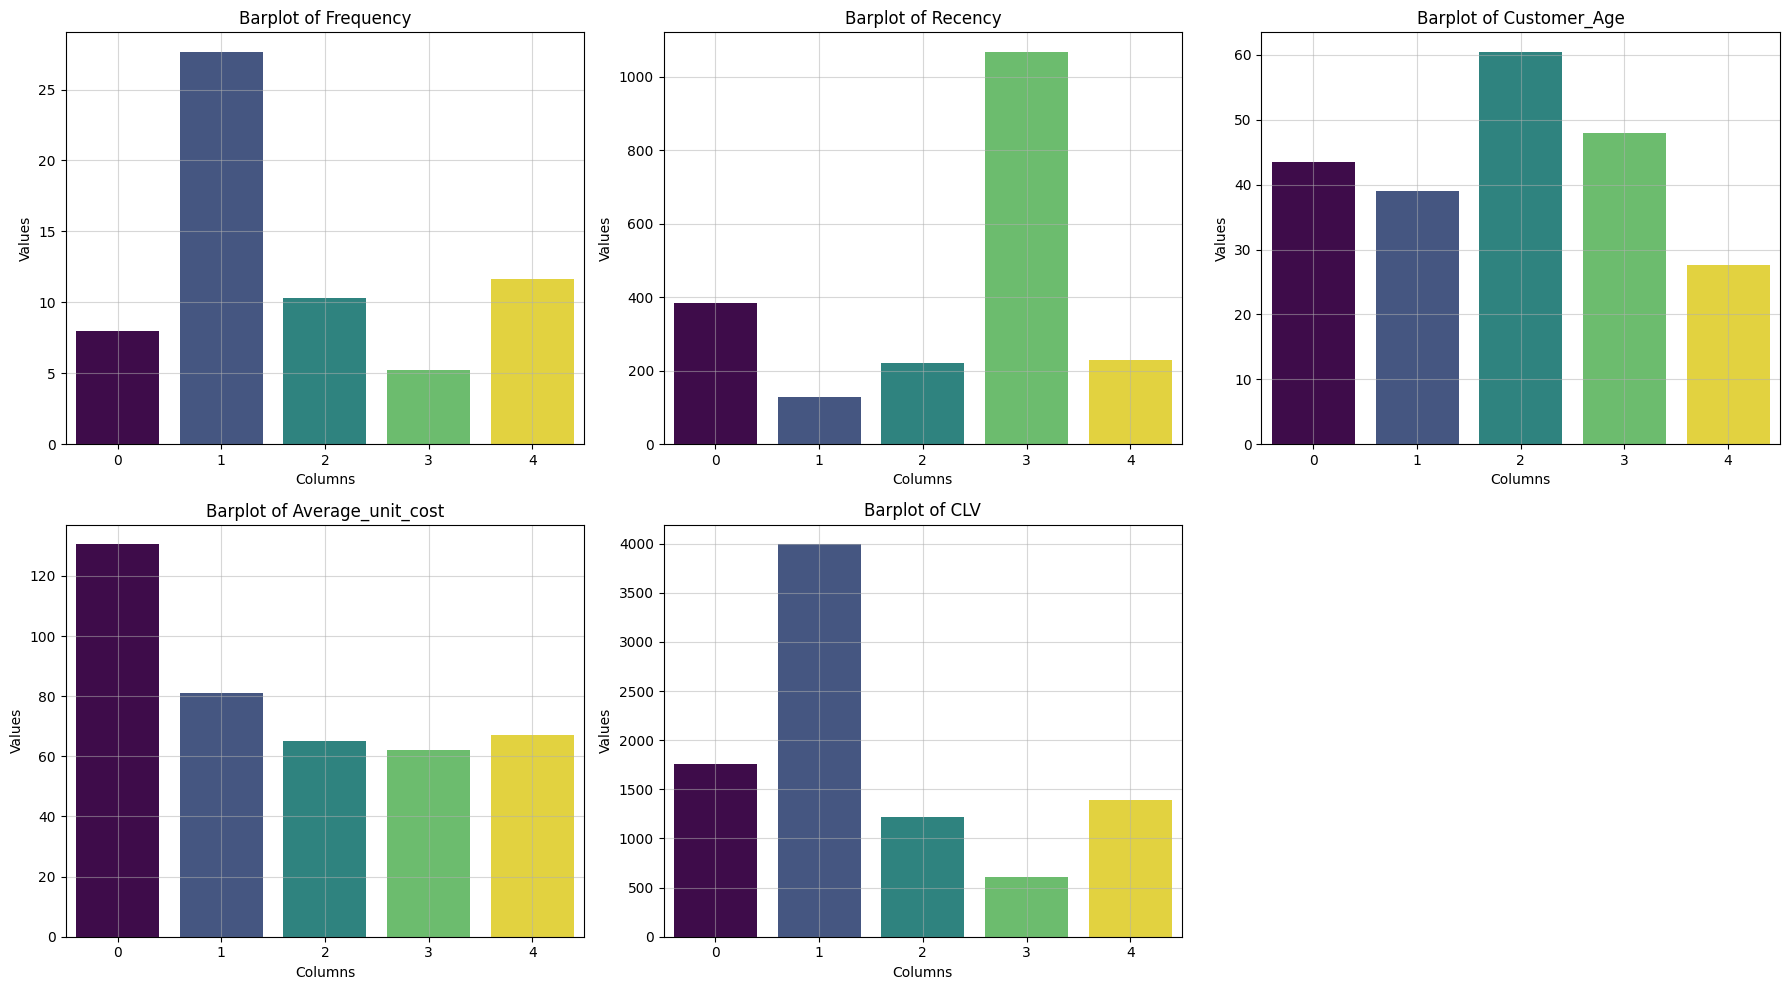

In [40]:
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)


fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes[1, 2].axis('off')

for j in range(5):
    ax = axes[j // 3, j % 3]
    values = summary_stats.iloc[1 + 8 * j, :].values
    columns = summary_stats.columns
    name = summary_stats.iloc[1 + 8 * j, :].name[0]

    sns.barplot(x=columns, y=values, palette=cmap.colors, ax=ax)
    ax.set_title(f'Barplot of {name}')
    ax.set_xlabel('Columns')
    ax.set_ylabel('Values')
    ax.grid(alpha=0.5)

plt.tight_layout()
plt.show()

In [41]:
centroids_original = scaler.inverse_transform(centroids)

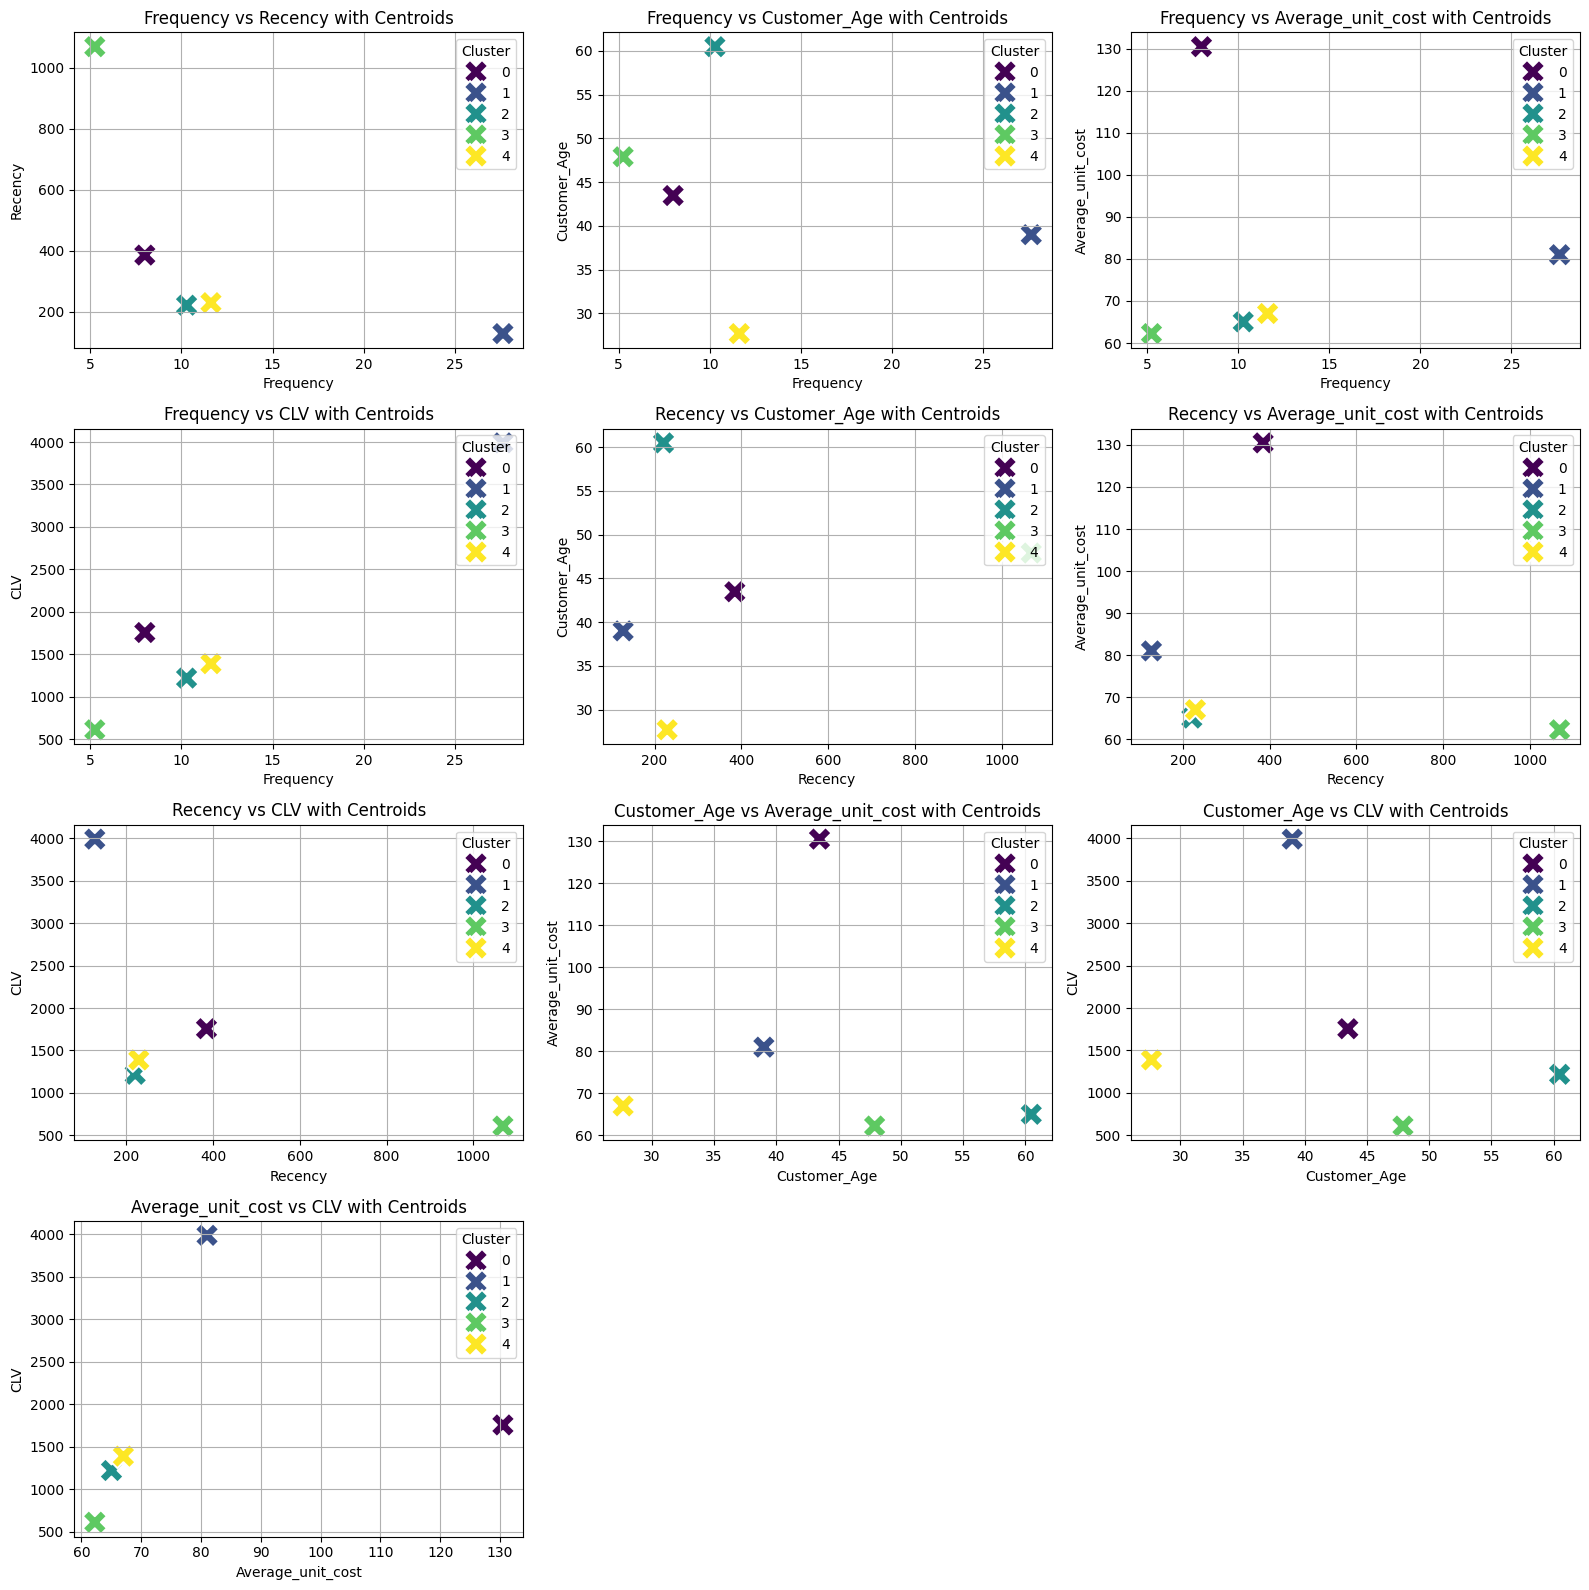

In [ ]:
columns_of_interest = df_original.columns[:5]

n_combinations = len(columns_of_interest) * (len(columns_of_interest) - 1) // 2

n_rows = (n_combinations + 2) // 3

fig, axes = plt.subplots(n_rows, 3, figsize=(16, 4 * n_rows))
axes = axes.flatten()

plot_idx = 0

for i in range(len(columns_of_interest)):
    for j in range(i + 1, len(columns_of_interest)):
        ax = axes[plot_idx]

        sns.scatterplot(x=centroids_original[:, i], y=centroids_original[:, j],
                        hue=np.arange(len(centroids_original)), palette='viridis', s=300, marker='X', ax=ax)

        ax.set_title(f'{columns_of_interest[i]} vs {columns_of_interest[j]} with Centroids')
        ax.set_xlabel(columns_of_interest[i])
        ax.set_ylabel(columns_of_interest[j])
        ax.legend(title='Cluster', loc='upper right')
        ax.grid(True)

        plot_idx += 1

for i in range(plot_idx, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


In these plot just the cluster's centroids have been plotted, to have a better comprehension of the graphs. The centroids represent the main characteristics of each cluster.

# Hierarchical Clustering

In this section hierarchical clustering is applied to clusters the data points. I chose 5 number of clusters since this has been the output of the previous analysis. The metric chose as linkage is the 'average'.

To perform the clustering a new dataframe has been created with the 30% of rows of the original dataset due to several crash caused by a lack of RAM memory.

In [43]:
df_scaled_reduced = df_scaled.sample(frac=0.3, random_state=42)
print(df_scaled_reduced.shape)
df_scaled_reduced.head()

(19466, 5)


,Frequency,Recency,Customer_Age,Average_unit_cost,CLV
Customer ID,,,,,
84815,1.214770,-0.721884,-1.157260,-0.021723,1.312725
76483,-1.182012,2.666422,0.278719,2.173284,-0.961189
56229,-0.452556,0.208341,-1.387017,1.030227,-0.287590
25397,-0.035725,-0.740073,-0.582869,0.522597,-0.208273
26637,-1.077804,0.642273,0.565915,-2.053603,-1.173665


In [47]:
linkage_matrix = linkage(df_scaled_reduced, method='average', metric='euclidean')

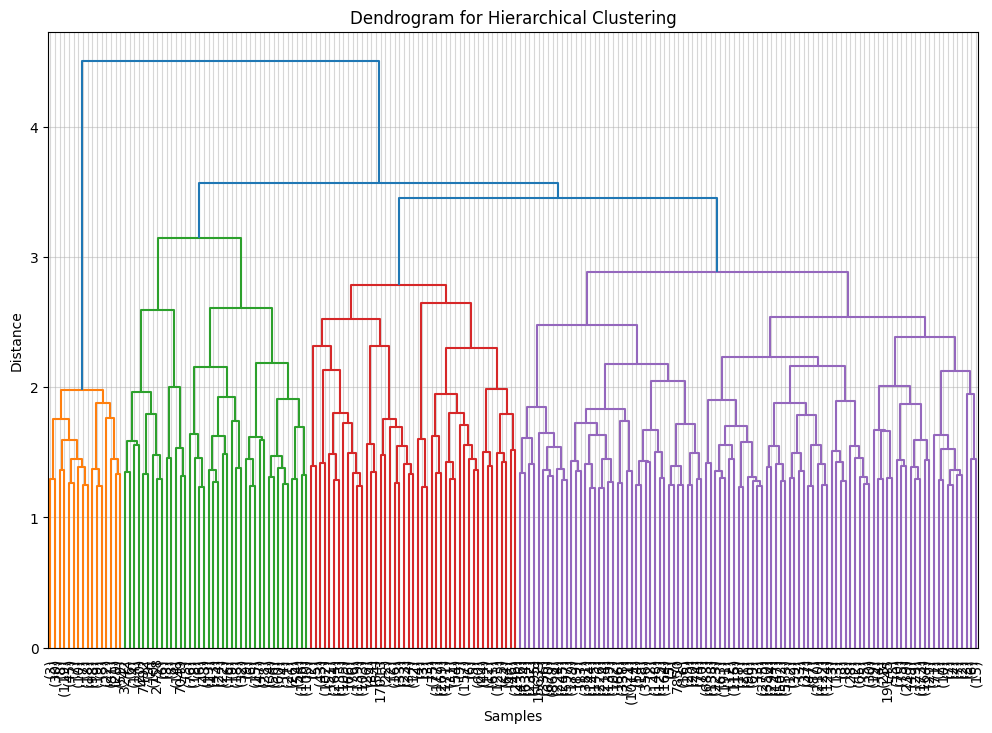

In [48]:
# aCreation of the Dendogram
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix,truncate_mode='lastp', p=200, leaf_rotation=90, leaf_font_size=10)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.grid(alpha=0.5)
plt.show()

In [51]:
agglo_cluster = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='average')
df_scaled_reduced['Hierarchical_cluster'] = agglo_cluster.fit_predict(df_scaled_reduced)


The dendrogram suggests that the optimal number of clusters appears to be 4 (or 2), as there is a clear jump in the distances at this point. However, based on previous analyses, I chose 5 clusters for the execution of hierarchical clustering. It has to be noticed that the dendogram is created with 30% of the original dataset

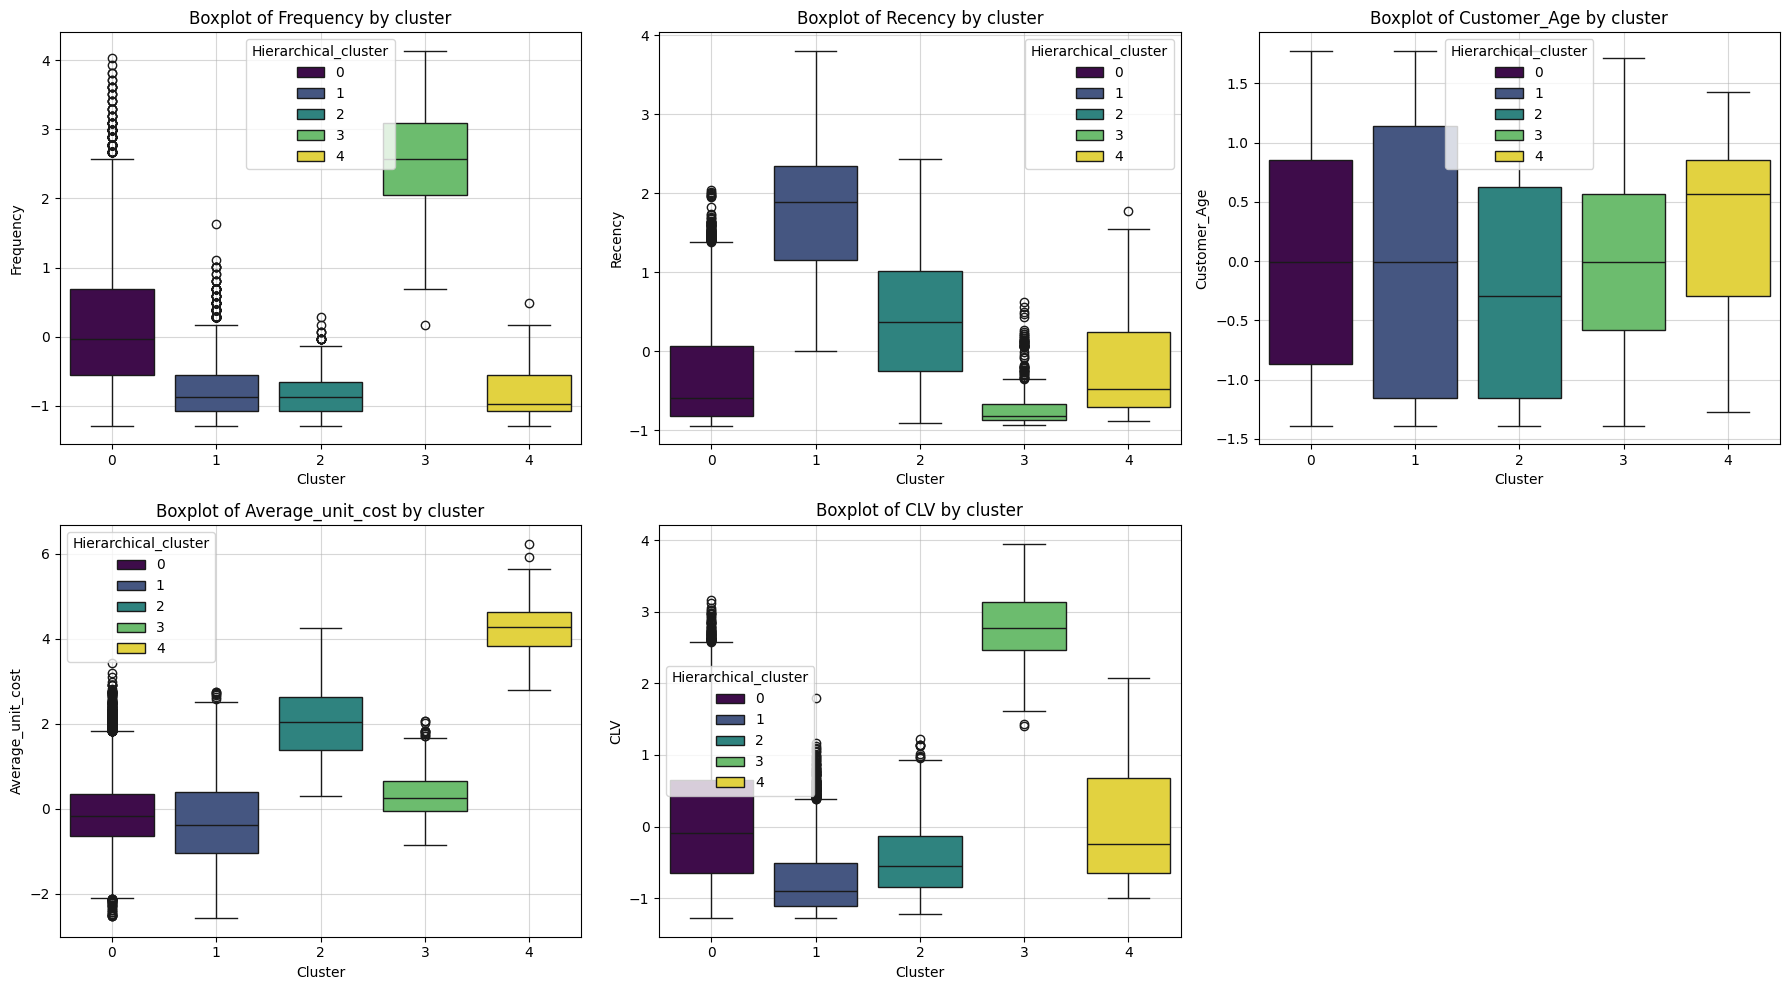

In [52]:
cmap = plt.get_cmap('viridis', df_scaled_reduced['Hierarchical_cluster'].nunique())
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes[1, 2].axis('off')

for i, col in enumerate(df_scaled_reduced.columns[:5]):  # Considera solo le prime 5 colonne
    if col == 'cluster':
        continue
    ax = axes[i // 3, i % 3]
    sns.boxplot(x='Hierarchical_cluster', y=col, data=df_scaled_reduced, hue='Hierarchical_cluster', palette=cmap, ax=ax)
    ax.set_title(f'Boxplot of {col} by cluster')
    ax.set_xlabel('Cluster')
    ax.grid(alpha=0.5)

plt.tight_layout()
plt.show()


In [53]:
summary_stats_hierachical =df_scaled_reduced.groupby('Hierarchical_cluster').describe()
summary_stats_hierachical = summary_stats_hierachical.transpose()
summary_stats_hierachical.iloc[:,:]

Hierarchical_cluster                0            1           2           3  \
Frequency         count  14892.000000  2991.000000  932.000000  554.000000   
                  mean       0.114072    -0.779465   -0.840541    2.550099   
                  std        0.888195     0.449505    0.311569    0.740263   
                  min       -1.286220    -1.286220   -1.286220    0.172691   
                  25%       -0.556764    -1.077804   -1.077804    2.048434   
                  50%       -0.035725    -0.869388   -0.869388    2.569473   
                  75%        0.693731    -0.556764   -0.660972    3.090513   
                  max        4.028384     1.631602    0.276899    4.132592   
Recency           count  14892.000000  2991.000000  932.000000  554.000000   
                  mean      -0.367408     1.834073    0.376392   -0.699953   
                  std        0.556048     0.759677    0.761224    0.286371   
                  min       -0.937551     0.008265   -0.906370   -0.927157   
                  25%       -0.818025     1.156755   -0.242480   -0.872591   
                  50%       -0.584169     1.884305    0.374638   -0.820623   
                  75%        0.062831     2.349418    1.019040   -0.664720   
                  max        2.045406     3.799322    2.429968    0.618887   
Customer_Age      count  14892.000000  2991.000000  932.000000  554.000000   
                  mean      -0.005762     0.063480   -0.159779   -0.022370   
                  std        0.987268     1.097909    1.027762    0.771338   
                  min       -1.387017    -1.387017   -1.387017   -1.387017   
                  25%       -0.870065    -1.157260   -1.157260   -0.582869   
                  50%       -0.008477    -0.008477   -0.295673   -0.008477   
                  75%        0.853110     1.140306    0.623354    0.565915   
                  max        1.772137     1.772137    1.772137    1.714698   
Average_unit_cost count  14892.000000  2991.000000  932.000000  554.000000   
                  mean      -0.106993    -0.305723    2.028656    0.324173   
                  std        0.787644     0.982646    0.806072    0.544722   
                  min       -2.530205    -2.567387    0.302367   -0.855084   
                  25%       -0.635490    -1.044908    1.386552   -0.049395   
                  50%       -0.164302    -0.389721    2.047232    0.255706   
                  75%        0.347069     0.388681    2.633746    0.646851   
                  max        3.434252     2.756361    4.243067    2.065486   
CLV               count  14892.000000  2991.000000  932.000000  554.000000   
                  mean       0.071961    -0.748109   -0.455705    2.785878   
                  std        0.896003     0.479123    0.495701    0.464846   
                  min       -1.275043    -1.275997   -1.215364    1.406665   
                  25%       -0.646691    -1.112405   -0.846584    2.472561   
                  50%       -0.094312    -0.900674   -0.553847    2.772470   
                  75%        0.645379    -0.513318   -0.127303    3.132296   
                  max        3.166615     1.790100    1.223534    3.951982   

Hierarchical_cluster             4  
Frequency         count  97.000000  
                  mean   -0.821044  
                  std     0.393681  
                  min    -1.286220  
                  25%    -1.077804  
                  50%    -0.973596  
                  75%    -0.556764  
                  max     0.485315  
Recency           count  97.000000  
                  mean   -0.165989  
                  std     0.709418  
                  min    -0.885583  
                  25%    -0.706294  
                  50%    -0.469840  
                  75%     0.244718  
                  max     1.775173  
Customer_Age      count  97.000000  
                  mean    0.252072  
                  std     0.785384  
                  min    -1.272139  
                  25%   

In [55]:
occurrences_hierachical = df_scaled_reduced['Hierarchical_cluster'].value_counts()
occurrences_hierachical.sort_index(inplace = True)

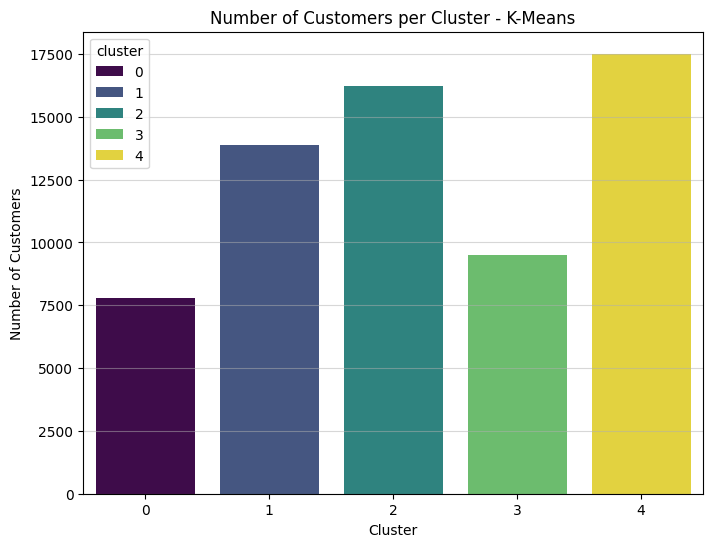

In [56]:
plt.figure(figsize=(8, 6))
cmap = plt.get_cmap('viridis', len(occurrences.index))
sns.barplot(x=occurrences.index, y=occurrences.values,hue =occurrences.index,  palette=cmap)
plt.xlabel("Cluster")
plt.ylabel("Number of Customers")
plt.title("Number of Customers per Cluster - K-Means")
plt.xticks(ticks=range(len(occurrences.index)), labels=occurrences.index)
plt.grid(axis='y', alpha=0.5)
plt.show()

# Conclusion

In [57]:
df_original.head()

,Frequency,Recency,Customer_Age,Average_unit_cost,CLV,cluster
Customer ID,,,,,,
1,35.0,17.0,63.0,89.622857,4322.70,1
3,20.0,119.0,33.0,90.505000,2821.00,1
4,9.0,1108.0,33.0,37.195556,782.67,3
5,19.0,5.0,28.0,107.947368,2810.98,1
6,15.0,190.0,58.0,52.526667,1604.58,2


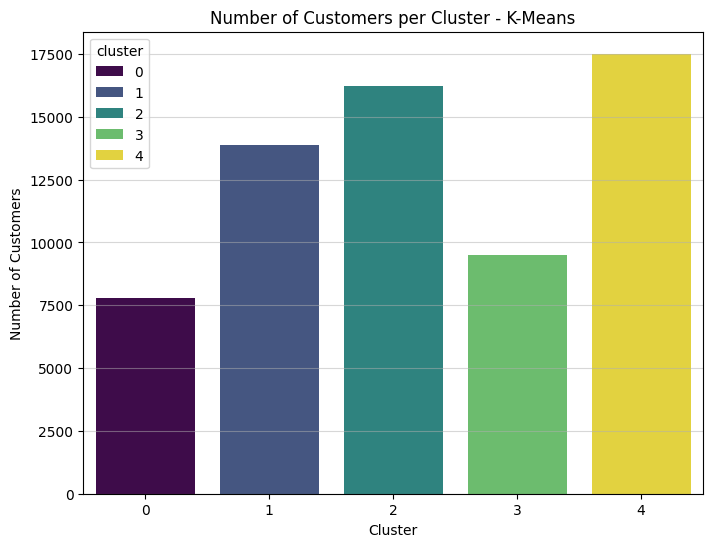

In [58]:
plt.figure(figsize=(8, 6))
cmap = plt.get_cmap('viridis', len(occurrences.index))
sns.barplot(x=occurrences.index, y=occurrences.values,hue =occurrences.index,  palette=cmap)
plt.xlabel("Cluster")
plt.ylabel("Number of Customers")
plt.title("Number of Customers per Cluster - K-Means")
plt.xticks(ticks=range(len(occurrences.index)), labels=occurrences.index)
plt.grid(axis='y', alpha=0.5)
plt.show()

Below the main characteristics of the clusters:

Cluster 0: This cluster includes customers who have made infrequent purchases of high-cost products over time. They contribute moderately to total revenues, but represent a segment of customers that purchase expensive items. Their age is not clearly defined.

Cluster 1: This group consists of loyal customers who make frequent purchases. Most of them have made recent purchases, though some have not bought in a while, possibly indicating churn. They are generally younger to middle-aged and purchase medium-cost products. Their contribution to revenues is high.

Cluster 2: Customers in this cluster tend to be older, with an average of around 10 purchases per customer. There are no significant product preferences, and their spending is moderate.

Cluster 3: This cluster represents customers who have largely disengaged from the platform, with the last purchase typically occurring about three years ago. They have made few purchases and are not clearly distinguished by age. They contribute the least to revenues.

Cluster 4: This group consists of young customers with moderate purchase frequency. No strong preferences for product types are observed. Some have made recent purchases, while others have bought further in the past.